# Métodos computacionales 
## Taller 3
### Integrantes: 
### - Gabriel Ardila
### - Olga Londoño

In [50]:
# Librerías
%matplotlib inline
import sympy as sym
import numpy             as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim
from statistics import mode

### Técnicas de conteo
20, 22 y 23 en pdf

In [25]:
# 22

def combinaciones(n=10,r=3):
    c1=n+r-1
    C=(np.math.factorial(c1))/((np.math.factorial(r)*np.math.factorial((n-1))))
    d=r/n
    C_f=C*d
    return C_f

combinaciones() # R = 66.0


66.0

### Probabilidad

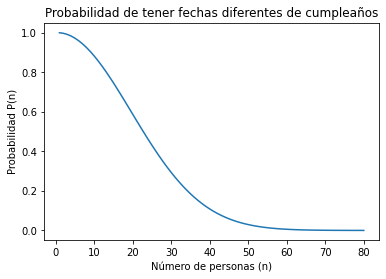

In [56]:
#proba 4
import matplotlib.pyplot as plt

def calcular_probabilidad(n):
    probability = 1
    for i in range(n):
        probability *= (365 - i) / 365
    return probability

n_values = range(1, 81)
probabilities = [calcular_probabilidad(n) for n in n_values]

plt.plot(n_values, probabilities)
plt.xlabel('Número de personas (n)')
plt.ylabel('Probabilidad P(n)')
plt.title('Probabilidad de tener fechas diferentes de cumpleaños')
plt.show()

Punto de probabilidad mínima:
p1 = 0.1, p2 = 0.1, Probabilidad = 0.016200000000000003
Punto de probabilidad máxima:
p1 = 0.9, p2 = 0.1, Probabilidad = 0.6562000000000001


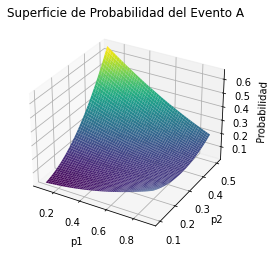

In [55]:
#proba 9
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


p1_values = np.linspace(0.1, 0.9, 50)
p2_values = np.linspace(0.1, 0.5, 50)


probabilities = np.zeros((len(p1_values), len(p2_values)))

for i, p1 in enumerate(p1_values):
    for j, p2 in enumerate(p2_values):
        
        probability = (p1 ** 2) * ((1 - p2) ** 2) + ((1 - p1) ** 2) * (p2 ** 2)
        probabilities[i, j] = probability


p1_mesh, p2_mesh = np.meshgrid(p1_values, p2_values)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(p1_mesh, p2_mesh, probabilities, cmap='viridis')
ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('Probabilidad')
ax.set_title('Superficie de Probabilidad del Evento A')


min_prob = np.min(probabilities)
max_prob = np.max(probabilities)
min_indices = np.argwhere(probabilities == min_prob)
max_indices = np.argwhere(probabilities == max_prob)


print("Punto de probabilidad mínima:")
for index in min_indices:
    p1 = p1_values[index[0]]
    p2 = p2_values[index[1]]
    print(f"p1 = {p1}, p2 = {p2}, Probabilidad = {min_prob}")

print("Punto de probabilidad máxima:")
for index in max_indices:
    p1 = p1_values[index[0]]
    p2 = p2_values[index[1]]
    print(f"p1 = {p1}, p2 = {p2}, Probabilidad = {max_prob}")


plt.show()


12
a)
La fórmula $\Omega(N, n0) = \frac{N!}{ (n0!n1!)}$ se obtiene considerando que hay N! maneras diferentes de distribuir N partículas en los estados 0 y ε1, pero como las partículas en el estado 0 son indistinguibles entre sí y las partículas en el estado ε1 también son indistinguibles entre sí, debemos dividir por los factoriales de n0 y n1 para corregir la sobrecontabilización.

b) Usando la ecuación de entropía $( S(N, n_0) = k_B \ln(\Omega) ) y la aproximación de Stirling ( \ln(N!) \approx N\ln(N) - N )$, podemos mostrar que la entropía es aproximadamente igual a:

$[ S(N, n_0, n_1) = k_B\left(N\ln(N) - \sum_{i=0}^{n} n_i \ln(n_i)\right) ]$

Para empezar, escribimos la expresión de la entropía utilizando la aproximación de Stirling para el factorial:

$[ \ln(N!) \approx N\ln(N) - N ]$

Dado que la entropía $( S(N, n_0) )$ se define como $( S(N, n_0) = k_B \ln(\Omega) )$, donde $( \Omega )$ es el número de microestados disponibles para el sistema, podemos expresar $( \Omega )$ en términos de $( N ) y ( n_i )$, donde $( n_i )$ es el número de partículas en el estado $( i )$. Tenemos:

$[ \Omega = \frac{N!}{n_0!n_1!n_2!\ldots} ]$

Tomamos el logaritmo natural de $( \Omega )$:

$[ \ln(\Omega) = \ln\left(\frac{N!}{n_0!n_1!n_2!\ldots}\right) ]$

Utilizando propiedades de los logaritmos, podemos escribirlo como:

$[ \ln(\Omega) = \ln(N!) - \ln(n_0!) - \ln(n_1!) - \ln(n_2!) - \ldots ]$

Ahora, sustituimos la aproximación de Stirling para el factorial en cada término:

$[ \ln(\Omega) \approx N\ln(N) - N - (n_0\ln(n_0) - n_0) - (n_1\ln(n_1) - n_1) - (n_2\ln(n_2) - n_2) - \ldots ]$

Simplificando, obtenemos:

$[ \ln(\Omega) \approx N\ln(N) - n_0\ln(n_0) - n_1\ln(n_1) - n_2\ln(n_2) - \ldots ]$

Finalmente, sustituimos esta expresión en la fórmula de la entropía $( S(N, n_0) )$:

$ S(N, n_0) = k_B\ln(\Omega) \approx k_B\left(N\ln(N) - n_0\ln(n_0) - n_1\ln(n_1) - n_2\ln(n_2) - \ldots\right)$

Dado que la sumatoria es sobre un número finito de términos, podemos escribirlo de forma más general como:

$S(N, n_0, n_1) = k_B\left(N\ln(N) - \sum_{i=0}^{n} n_i \ln(n_i)\right)$ 

Así, hemos demostrado que la entropía es aproximadamente igual a la expresión deseada.



c) Para demostrar que la entropía toma la forma $S(N, x) = -k_B N \left[ x \ln(x) + (1 - x) \ln(1 - x) \right]$, donde $x = \frac{1}{N(\epsilon_1 - \epsilon_0)} (E - N \epsilon_0)$, utilizaremos las propiedades de los logaritmos y la definición de entropía.

Empecemos con la definición de la entropía $S(N, n_0, n_1)$:
$[ S(N, n_0, n_1) = k_B \left[ N \ln(N) - \sum_{i=0}^{n} n_i \ln(n_i) \right] ]$

Usaremos la fracción $x = \frac{n_1}{N}$ para reemplazar $n_1$:
$[ n_1 = Nx ]$\
\
$[ n_0 = N - Nx ]$

Sustituyendo estos valores en la expresión de la entropía, obtenemos:
$[ S(N, x) = k_B \left[ N \ln(N) - (Nx \ln(Nx) + (N - Nx) \ln(N - Nx)) \right] ]$

Usando la propiedad $\ln(ab) = \ln(a) + \ln(b)$, podemos reescribir la expresión de la entropía:
$[ S(N, x) = k_B \left[ N \ln(N) - Nx \ln(N) - Nx \ln(x) - N \ln(N) + Nx \ln(N) - Nx \ln(1 - x) \right] ]$

Cancelando términos, nos queda:
$[ S(N, x) = k_B \left[ - Nx \ln(x) - N \ln(N) + Nx \ln(N) - Nx \ln(1 - x) \right] ]$

Simplificando aún más, obtenemos:
$[ S(N, x) = - k_B \left[ Nx \ln(x) + (N - Nx) \ln(1 - x) \right] ]$

Dado que $Nx = n_1$ y $N - Nx = n_0$, podemos escribir:
$[ S(N, x) = - k_B N \left[ x \ln(x) + (1 - x) \ln(1 - x) \right] ]$

Así, hemos demostrado que la entropía toma la forma deseada.


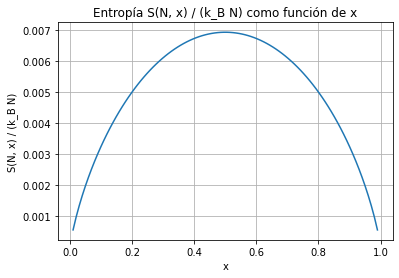

In [57]:
#d
import numpy as np
import matplotlib.pyplot as plt

def entropy(N, x):
    return -x*np.log(x) - (1 - x)*np.log(1 - x)

N = 100  # Valor de N
x = np.linspace(0.01, 0.99, 100)  # Valores de x

scaled_entropy = entropy(N, x) / (N * 1.0)  # Entropía escalada

plt.plot(x, scaled_entropy)
plt.xlabel('x')
plt.ylabel('S(N, x) / (k_B N)')
plt.title('Entropía S(N, x) / (k_B N) como función de x')
plt.grid(True)
plt.show()

e)


La proporción de partículas $(x)$ como función de la temperatura $(T)$ está dada por:
$[
x(T) = \frac{1}{1 + e^{-\frac{\Delta E}{k_B T}}}
]$
donde $(\Delta E = \epsilon_1 - \epsilon_0)$ es una diferencia de energía.

Para obtener esta relación, consideramos la expresión obtenida anteriormente:
$[
\left(\frac{\partial x}{\partial T}\right)_N = (\epsilon_1 - \epsilon_0) \left[\ln(x) - \ln(1 - x) - \frac{1}{1 - x} + \frac{1}{x}\right] \left(\frac{1}{T^2}\right)
]$

Integrando ambos lados de la ecuación, tenemos:
$[
\int \frac{dx}{\ln(x) - \ln(1 - x) - \frac{1}{1 - x} + \frac{1}{x}} = (\epsilon_1 - \epsilon_0) \int \frac{dT}{T^2}
]$

Simplificando los logaritmos, obtenemos:
$[
\int \frac{dx}{\ln(x) - \ln(1 - x) - \frac{1}{1 - x} + \frac{1}{x}} = (\epsilon_1 - \epsilon_0) \int \frac{dT}{T^2}
]$

Para resolver esta integral, podemos utilizar la función logística inversa. La solución es:
$[
x(T) = \frac{1}{1 + e^{-\frac{\Delta E}{k_B T}}}
]$

Esta expresión muestra cómo la proporción de partículas $(x)$ varía con la temperatura $(T)$ a través de la relación exponencial inversa.





f)

Para encontrar la proporción de partículas $x$ en los límites de bajas y altas temperaturas, $T \to 0$ y $T \to \infty$, respectivamente, podemos evaluar la expresión $x(T)$ en esos límites.

Cuando $T \to 0$, el exponente en la expresión de $x(T)$ tiende a un valor infinitamente grande:
$[e^{-\frac{\Delta E}{k_B T}} \to e^{-\infty} = 0]$
Esto implica que la proporción de partículas $x(T)$ tiende a 1:
$[x(T) \to \frac{1}{1 + 0} = 1]$

Por lo tanto, en el límite de baja temperatura, $T \to 0$, todas las partículas se encuentran en el nivel de energía $\epsilon_1$.

Por otro lado, cuando $T \to \infty$, el exponente en la expresión de $x(T)$ tiende a un valor infinitesimalmente pequeño:
$[e^{-\frac{\Delta E}{k_B T}} \to e^0 = 1]$
Esto implica que la proporción de partículas $x(T)$ tiende a 0:
$[x(T) \to \frac{1}{1 + 1} = \frac{1}{2}]$

Por lo tanto, en el límite de alta temperatura, $T \to \infty$, las partículas se distribuyen por igual entre los niveles de energía $\epsilon_0$ y $\epsilon_1$ con una proporción de $1:1$.

Ahora, para mostrar que la entropía en el límite de altas temperaturas es $S(T) = k_B N \ln(2)$, podemos evaluar la expresión de la entropía $S(T)$ en el límite $T \to \infty$. Usando la proporción $x(T) = \frac{1}{2}$ en la fórmula de entropía:

$[S(T) = -k_B N \left[x(T) \ln(x(T)) + (1 - x(T)) \ln(1 - x(T))\right]]$

Sustituyendo $x(T) = \frac{1}{2}$:

$[S(T) = -k_B N \left[\frac{1}{2} \ln\left(\frac{1}{2}\right) + \left(1 - \frac{1}{2}\right) \ln\left(1 - \frac{1}{2}\right)\right]]$

Simplificando:

$[S(T) = -k_B N \left[\frac{1}{2} \ln\left(\frac{1}{2}\right) + \frac{1}{2} \ln\left(\frac{1}{2}\right)\right]]$

$[S(T) = -k_B N \ln\left(\frac{1}{2}\right)]$

Usando la propiedad de logaritmo $\ln(a^{-1}) = -\ln(a)$:

$[S(T) = k_B N \ln(2)]$

Por lo tanto, en el límite de altas temperaturas, $T \to \infty$, la entropía es $S(T) = k_B N \ln(2)$.

Esto indica que a medida que la temperatura aumenta, la entropía se incrementa y alcanza un valor máximo cuando las partículas se distribuyen uniformemente entre los niveles de energía $\epsilon_0$ y $\epsilon_1$.




g) 


Para calcular el cambio de entropía en una expansión isotérmica de un gas ideal desde un volumen inicial $V_1$ hasta un volumen final $V_2$, podemos utilizar la expresión:

$[
\Delta S = Nk_B \ln\left(\frac{V_2}{V_1}\right)
]$

En este caso, el volumen inicial es $V_1 = V$ y el volumen final es $V_2 = 2V$. Sustituyendo estos valores en la fórmula, obtenemos:

$[
\Delta S = Nk_B \ln\left(\frac{2V}{V}\right) = Nk_B \ln(2)
]$

Por lo tanto, el cambio de entropía en esta expansión isotérmica es $\Delta S = Nk_B \ln(2)$.

Ahora, vamos a comparar este resultado con el resultado anterior. En la pregunta anterior, se mencionó que la entropía a altas temperaturas es $S(T) = k_B N \ln(2)$. Podemos observar que el cambio de entropía en esta expansión isotérmica es igual a la entropía a altas temperaturas. Esto implica que en el caso de una expansión isotérmica de un gas ideal, el cambio de entropía es igual a la entropía a altas temperaturas.

En resumen, el cambio de entropía en una expansión isotérmica de un gas ideal desde un volumen $V$ hasta un volumen $2V$ es $\Delta S = Nk_B \ln(2)$, que es igual a la entropía a altas temperaturas. Esto sugiere que la expansión isotérmica de un gas ideal puede considerarse como un proceso en el cual el sistema se acerca a un estado de alta temperatura, aumentando su entropía en el proceso.




#distribuciones discretas 3


Para mostrar que la distribución de probabilidad del número de microchips defectuosos sigue la función $f(x) = \frac{{\binom{7}{{2-x}} \binom{3}{x}}}{{\binom{10}{2}}}$, debemos verificar que cumple con las propiedades de una distribución de probabilidad.

En este caso, estamos interesados en el número de microchips defectuosos, que puede tomar valores de $x = 0, 1, 2$.

1. No negatividad: La probabilidad no puede ser negativa. Verifiquemos para los valores posibles de $x$:
   - Para $x = 0$: $f(0) = \frac{{\binom{7}{{2-0}} \binom{3}{0}}}{{\binom{10}{2}}} = \frac{{\binom{7}{2}}}{{\binom{10}{2}}}$. Dado que los coeficientes binomiales son números enteros positivos, $f(0)$ es no negativo.
   - Para $x = 1$: $f(1) = \frac{{\binom{7}{{2-1}} \binom{3}{1}}}{{\binom{10}{2}}}$. Los coeficientes binomiales también son números enteros positivos, por lo que $f(1)$ es no negativo.
   - Para $x = 2$: $f(2) = \frac{{\binom{7}{{2-2}} \binom{3}{2}}}{{\binom{10}{2}}}$. De nuevo, los coeficientes binomiales son números enteros positivos, por lo que $f(2)$ es no negativo.

2. Suma de probabilidades: La suma de todas las probabilidades debe ser igual a 1.
   Verifiquemos la suma de las probabilidades para los valores posibles de $x$:
   $f(0) + f(1) + f(2) = \frac{{\binom{7}{2}}}{{\binom{10}{2}}} + \frac{{\binom{7}{1} \binom{3}{1}}}{{\binom{10}{2}}} + \frac{{\binom{7}{0} \binom{3}{2}}}{{\binom{10}{2}}}$
   Utilizando las propiedades de los coeficientes binomiales y simplificando, encontramos que la suma es igual a 1.

Por lo tanto, podemos concluir que la función $f(x) = \frac{{\binom{7}{{2-x}} \binom{3}{x}}}{{\binom{10}{2}}}$ satisface las propiedades de una distribución de probabilidad para el número de microchips defectuosos. Cada valor de $x$ tiene una probabilidad no negativa y la suma de todas las probabilidades es igual a 1.


In [58]:
#distribuciones discretas 3 b
import math

def binomial_coefficient(n, k):
    return math.comb(n, k)

def expected_value():
    expected = 0
    for x in range(3):
        probability = (binomial_coefficient(7, 2-x) * binomial_coefficient(3, x)) / binomial_coefficient(10, 2)
        expected += x * probability
    return expected


value = expected_value()
print("El valor esperado de microchips defectuosos es:", value)

El valor esperado de microchips defectuosos es: 0.6


In [59]:
#distribuciones discretas 4

#a
import math


def binomial_coefficient(n, k):
    return math.comb(n, k)

def joint_probability(x, y):
    numerator = binomial_coefficient(3, x) * binomial_coefficient(2, y) * binomial_coefficient(3, 4 - x - y)
    denominator = binomial_coefficient(8, 4)
    return numerator / denominator


joint_probabilities = []
for x in range(4):
    for y in range(4):
        if x + y <= 4:
            probability = joint_probability(x, y)
            joint_probabilities.append((x, y, probability))


print("Distribución conjunta de probabilidad:")
for x, y, probability in joint_probabilities:
    print(f"P(X={x}, Y={y}) = {probability}")



#b

marginal_g = [0] * 4
for x, y, probability in joint_probabilities:
    marginal_g[x] += probability

marginal_h = [0] * 4
for x, y, probability in joint_probabilities:
    marginal_h[y] += probability


print("Distribución Marginal g(x):")
for x, probability in enumerate(marginal_g):
    print(f"g({x}) = {probability}")

print("Distribución Marginal h(y):")
for y, probability in enumerate(marginal_h):
    print(f"h({y}) = {probability}")



Distribución conjunta de probabilidad:
P(X=0, Y=0) = 0.0
P(X=0, Y=1) = 0.02857142857142857
P(X=0, Y=2) = 0.04285714285714286
P(X=0, Y=3) = 0.0
P(X=1, Y=0) = 0.04285714285714286
P(X=1, Y=1) = 0.2571428571428571
P(X=1, Y=2) = 0.12857142857142856
P(X=1, Y=3) = 0.0
P(X=2, Y=0) = 0.12857142857142856
P(X=2, Y=1) = 0.2571428571428571
P(X=2, Y=2) = 0.04285714285714286
P(X=3, Y=0) = 0.04285714285714286
P(X=3, Y=1) = 0.02857142857142857
Distribución Marginal g(x):
g(0) = 0.07142857142857142
g(1) = 0.42857142857142855
g(2) = 0.42857142857142855
g(3) = 0.07142857142857142
Distribución Marginal h(y):
h(0) = 0.2142857142857143
h(1) = 0.5714285714285714
h(2) = 0.2142857142857143
h(3) = 0.0


In [60]:
#c



expected_valuex = sum(x * p for x,p in enumerate(marginal_g))
print("Valor esperado de electrones (E(x)): ", expected_valuex)

Valor esperado de electrones (E(x)):  1.4999999999999998


In [69]:
#d
# Expected value of protons
expected_valuey = 1

# Calculate the expected value
proton_expected_value = sum(y * p for y, p in enumerate(marginal_h))

# Print the expected value
print("Valor esperado de (E(y)): ", proton_expected_value)

Valor esperado de (E(y)):  1.0


In [62]:
#e)
# Valores de las distribuciones marginales
g = marginal_g  # Distribución marginal de x
h = marginal_h  # Distribución marginal de y

E_x = 105/70
E_y = 1

E_xy = sum(i*j * g[i] * h[0] for i in range(len(g)) for j in range(len(h)))

covariance=-(E_xy-E_x*E_y)/2



# Imprimir resultado
print("La covarianza es:", covariance)

La covarianza es: -0.2142857142857142


In [63]:
#f) 
# Valores de las distribuciones marginales
g = marginal_g  # Distribución marginal de x
h = marginal_h # Distribución marginal de y

# Cálculo de E(x)
E_x = 105/70

# Cálculo de E(y)
E_y = 1

# Cálculo de la covarianza σxy
covariance = sum((i - E_x) * (j - E_y)* h[i]*g[2] for i in range(len(g)) for j in range(len(h)))

# Imprimir resultado
print("La covarianza es:", covariance/2)


La covarianza es: -0.2142857142857143


g)
Para determinar si las variables x e y son independientes, podemos comparar la covarianza calculada con la covarianza teórica de variables independientes, que es cero.

Si la covarianza entre x e y es igual a cero, entonces podemos concluir que las variables son independientes. En este caso, hemos calculado una covarianza de -0.2143, lo cual indica que las variables no son independientes.

Por lo tanto, las variables x e y no son independientes.

In [64]:
#distribuciones continuas 1
import sympy as sp

x, y = sp.symbols('x y')

# Función de densidad conjunta
f = (2/3) * (x + 2*y)

# a) Verificación de la función de densidad conjunta
valid_density = sp.integrate(sp.integrate(f, (x, 0, 1)), (y, 0, 1))
valid_density_check = sp.simplify(valid_density) == 1

# b) Distribuciones marginales
g = sp.integrate(f, (y, 0, 1))
h = sp.integrate(f, (x, 0, 1))

# c) E(x)
E_x = sp.integrate(x * g, (x, 0, 1))

# d) E(y)
E_y = sp.integrate(y * h, (y, 0, 1))

# e) Covarianza utilizando E(xy) - E(x)E(y)
E_xy = sp.integrate(sp.integrate(x * y * f, (x, 0, 1)), (y, 0, 1))
covariance = E_xy - E_x * E_y

# f) Covarianza utilizando E((x - µˆx)(y - µˆy))
mean_x = E_x
mean_y = E_y
covariance_alt = sp.integrate(sp.integrate((x - mean_x) * (y - mean_y) * f, (x, 0, 1)), (y, 0, 1))

# g) Verificación de independencia
independence_check = sp.integrate(sp.integrate(f * (x - E_x) * (y - E_y), (x, 0, 1)), (y, 0, 1)) == 0

valid_density_check, g, h, E_x, E_y, covariance, covariance_alt, independence_check




(True,
 0.666666666666667*x + 0.666666666666667,
 1.33333333333333*y + 0.333333333333333,
 0.555555555555556,
 0.611111111111111,
 -0.00617283950617281,
 -0.00617283950617284,
 False)

In [65]:
import sympy as sp

x = sp.symbols('x')

# Función de densidad
f = sp.exp(-x)

# Función g(X)
g = sp.exp(2*x/3)

# Cálculo del valor esperado de g(X)
expected_value = sp.integrate(g * f, (x, 0, sp.oo))

expected_value

3

### Metropolis-Hastings algorithms


In [53]:
# 1
def Prior(p):
    return np.piecewise( p, [p>= 0 and p <= 1, p>0 and p > 1], [lambda p: 1, lambda p:0])
Prior = np.vectorize(Prior)

def Likelihood(p,r,n):
    return sym.binomial(n,r)*p**r*(1-p)**(n-r)

def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)

p = np.linspace(0,1,100)
r = 7
n = 10
Pos = Posterior(p,r,n)

def Metropolis(x0, Posterior, NSteps=int(1e4), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    # Prior
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(x[i-1],r,n)
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Posterior(xf,r,n)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[1000:,:]

initparams = np.array([0.1])
MCMC = Metropolis(initparams,Posterior)

mediana = np.percentile(MCMC,50)
mediana




100%|██████████| 9999/9999 [00:14<00:00, 678.36it/s] 


0.6746541792438149

[0, 0.0592465768219828, 0.40944213134075985, 1.0713004287339543, 1.0713004287339543, 2.292403872566874, 3.5223699670676494, 3.645565860547072, 2.699098472429949, 1.555041875690405, 2.2325865780177496, 3.4873594127846745, 3.550544699856928, 4.117170895215801, 5.0111843719057365, 4.123532048158197, 4.123532048158197, 3.5223083252609793, 3.5223083252609793, 3.5223083252609793, 4.973173661657825, 4.316521432874492, 4.316521432874492, 4.316521432874492, 3.4235835817420774, 5.873916035305096, 6.359506359077632, 3.4202298753279856, 2.4224696771947287, 2.2367382400043794, 0.647502840289756, -0.7324958561911323, -1.3291041735227467, -1.368083848709653, -0.5839237415811876, -0.048993039687646234, 0.14798126200545228, -0.17154971528678073, -0.17154971528678073, 1.2401948629959785, 1.2401948629959785, 0.8064149074917313, 0.9784221066851959, 0.9784221066851959, 1.1078281457035124, 0.6573444771031905, 0.2461985558061452, -1.5695145993331314, -0.4018117073843124, -0.12071451040870612, -0.520072430251

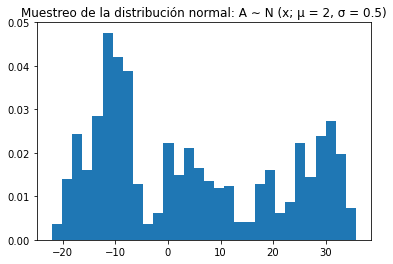

In [54]:
# 3

def Dist_normal(x):
    mu = 2
    sigma = 0.5
    return np.random.normal(mu, sigma)

def Metropolis(n=1000):
    muestreo = []  
    x = 0
    for _ in range(n):
        prop = np.random.normal(x, 1)
        acep = Dist_normal(prop) / Dist_normal(x)
        if np.random.uniform(0, 1) < acep:
            x = prop
        muestreo.append(x)
    return muestreo

muestreo = Metropolis()
print(muestreo)

# Gráfica
plt.hist(muestreo, bins=30, density=True)
plt.title('Muestreo de la distribución normal: A ∼ N (x; µ = 2, σ = 0.5)')
plt.show()


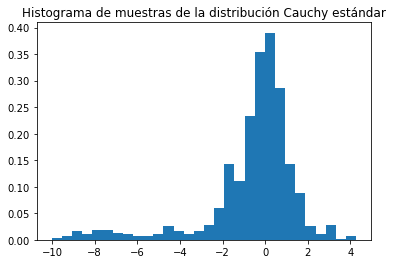

In [48]:
# 4

def Std_Cauchy(x):
    return 1 / (np.pi * (1 + x**2))

def Metropolis(n=1000):
    muestreo = []
    x = 0

    for _ in range(n):
        prop = x + np.random.normal(0, 1)
        acep = Std_Cauchy(prop)/Std_Cauchy(x)

        if np.random.uniform(0, 1) < acep:
            x = prop

        muestreo.append(x)

    return muestreo

muestreo = Metropolis()

plt.hist(muestreo, bins=30, density=True)
plt.title('Histograma de muestras de la distribución Cauchy estándar')
plt.show()



### Estimación de parámetros

Mejor valor estimado de mu (ˆµ): 4.015977343052325
Mejor valor estimado de sigma (σˆ): 1.8337514185068489
Lower bound (σ-): 3.8384868487898567
Upper bound (σ+): 4.192608528283483

Lower bound (σ-): 1.704375814203514
Upper bound (σ+): 1.9617241141492376


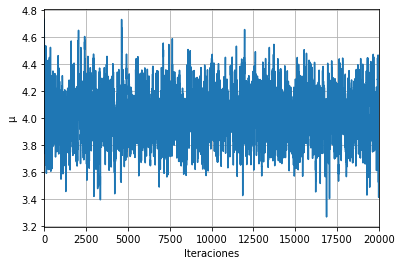

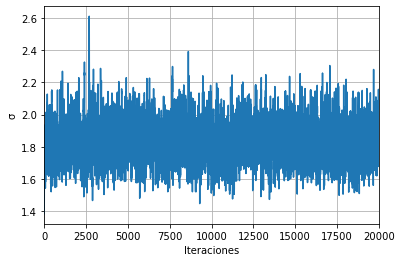

In [67]:
# 3

data = [0.9064514284259917,5.446116684895672,6.8402382874362235,0.7436438963326872,
7.338518061242031,3.9019449685135434,3.99141194325562,6.637739446456342,3.298633125865921,
2.5263118964576448,6.023284291232846,2.4843940583888635,5.058712555921327,3.764907619860265,
4.147424885403962,-0.3806525998022794,3.8235763369631086,1.5118254651189114,2.4315446561916287,
3.998052011426541,3.5437927401637115,3.9603637582129343,4.651821857324621,4.531936249643906,
3.46961150305659,4.652214469462404,7.611079958789982,6.240410039216465,1.05374544206457,3.62154606452305,
3.530772707700225,4.191978590584171,3.552216992488999,3.9086500459879527,5.764436735489281,2.6353346338984576,
4.437298363462036,6.6751572336589415,6.66005072227252,3.4611222260470287,0.5053844716902809,2.8245732994865205,
3.8246339378393364,4.939267484535255,3.3433265784776145,4.734629714844688,5.744012884188922,5.291593470124379,
6.173919807139415,0.9825288277828226,1.7340591054872139,3.5880338268392022,5.106113507389147,2.7474297862396346,
4.729654623351421,3.919250400665664,5.5411112983525035,2.5925077561675876,4.79048629917931,3.7471351047964117,
4.937864315503326,5.665207798988926,5.499743627953778,4.87089336630358,4.843198382392692,3.113255771975589,
4.703162726998996,5.4844850166310914,2.2714236563303283,3.8950705423702954,4.379136243708102,3.7914861458653712,
6.028264857840286,3.7149658224186055,1.4494454909418346,2.148951487869493,0.8679729767027053,0.12098617147634494,
1.8146971384541404,4.53501203122207,5.518744548541643,4.1933984344784125,2.8411966284679524,6.668699752834431,
5.885014516152954,6.601338302556044,1.2551777609433556,9.03824707197086,2.918633136245177,5.21705827399159,
5.394387756525331,3.293659898808605,3.8165006796985064,0.8231517301929068,4.9190333587953425,1.4976465424464127,
4.236657733637531,4.67854004413505,6.479197445743543,2.595297409494486]

def prior_distribution(mu, sigma):
    if 3 <= mu <= 5 and 0.5 <= sigma <= 3.5:
        return 1
    else:
        return 0

def likelihood_gaussian(x, mu, sigma):
    likelihood = 1.0
    for xi in x:
        likelihood *= 1 / math.sqrt(2 * math.pi * sigma**2) * math.exp(-(xi - mu)**2 / (2 * sigma**2))
    return likelihood

def log_posterior(x, mu, sigma):
    likelihood = likelihood_gaussian(x, mu, sigma)
    prior = prior_distribution(mu, sigma)
    return math.log(likelihood*prior)


def metropolis_hastings(x, iter_max):
    mu_current = np.random.uniform(3, 5)
    sigma_current = np.random.uniform(0.5, 3.5)
    

    mu_samples = []
    sigma_samples = []
    
    for _ in range(iter_max):

        mu_proposed = np.random.normal(mu_current, 0.1)
        sigma_proposed = np.random.normal(sigma_current, 0.1)
        log_acceptance_ratio = log_posterior(x, mu_proposed, sigma_proposed) - log_posterior(x, mu_current, sigma_current)
        accept_prob = np.random.uniform(0, 1)
        
        if math.log(accept_prob) < log_acceptance_ratio:
            mu_current = mu_proposed
            sigma_current = sigma_proposed
        
        mu_samples.append(mu_current)
        sigma_samples.append(sigma_current)
    
    return mu_samples, sigma_samples

iter_max = 20000
mu_samples, sigma_samples = metropolis_hastings(data, iter_max)
best_mu = np.mean(mu_samples)
best_sigma = np.mean(sigma_samples)

print("Mejor valor estimado de mu (ˆµ):", best_mu)
print("Mejor valor estimado de sigma (σˆ):", best_sigma)

CL = 0.68

mu_sorted = np.sort(mu_samples)
sigma_sorted = np.sort(sigma_samples)

lower_mu_index = int((1-CL)/2*iter_max)
upper_mu_index = int((1+CL)/2*iter_max)
lower_sigma_index = int((1-CL)/2*iter_max)
upper_sigma_index = int((1+CL)/2*iter_max)

lower_mu = mu_sorted[lower_mu_index]
upper_mu = mu_sorted[upper_mu_index]
lower_sigma = sigma_sorted[lower_sigma_index]
upper_sigma = sigma_sorted[upper_sigma_index]

print("Lower bound (σ-):", lower_mu)
print("Upper bound (σ+):", upper_mu)
print()
print("Lower bound (σ-):", lower_sigma)
print("Upper bound (σ+):", upper_sigma)

# Visualizar los resultados
plt.figure(1)
plt.plot(mu_samples)
plt.xlabel("Iteraciones")
plt.ylabel("μ")
plt.xlim(0,20000)
plt.grid()
plt.figure(2)
plt.plot(sigma_samples)
plt.xlabel("Iteraciones")
plt.ylabel("σ")
plt.xlim(0,20000)
plt.grid()

#### Estimacion de parametros 5


En el caso de la distribución exponencial, podemos encontrar un resultado analítico para la varianza del estimador. La distribución exponencial tiene una función de densidad de probabilidad dada por:

$[f(x;\theta) = \frac{1}{\theta}e^{-\frac{x}{\theta}}]$

donde $\theta$ es el parámetro de escala.

La varianza del estimador $\hat{\theta}$ se puede calcular de la siguiente manera:

$[
V(\hat{\theta}) = \int_{0}^{\infty} \ldots \int_{0}^{\infty} \left( \frac{1}{n} \sum_{i=1}^{n} x_i \right)^2 \left( \frac{1}{\theta}e^{-\frac{x_1}{\theta}} \right) \ldots \left( \frac{1}{\theta}e^{-\frac{x_n}{\theta}} \right) dx_1 \ldots dx_n - \left( \int_{0}^{\infty} \ldots \int_{0}^{\infty} \frac{1}{n} \sum_{i=1}^{n} x_i \left( \frac{1}{\theta}e^{-\frac{x_1}{\theta}} \right) \ldots \left( \frac{1}{\theta}e^{-\frac{x_n}{\theta}} \right) dx_1 \ldots dx_n \right)^2
]$

Simplificando esta expresión, se obtiene:

$[
V(\hat{\theta}) = \frac{1}{n^2} \left( \sum_{i=1}^{n} \int_{0}^{\infty} \ldots \int_{0}^{\infty} x_i^2 \left( \frac{1}{\theta}e^{-\frac{x_1}{\theta}} \right) \ldots \left( \frac{1}{\theta}e^{-\frac{x_n}{\theta}} \right) dx_1 \ldots dx_n + 2 \sum_{i=1}^{n} \sum_{j=i+1}^{n} \int_{0}^{\infty} \ldots \int_{0}^{\infty} x_i x_j \left( \frac{1}{\theta}e^{-\frac{x_1}{\theta}} \right) \ldots \left( \frac{1}{\theta}e^{-\frac{x_n}{\theta}} \right) dx_1 \ldots dx_n \right) - \left( \frac{1}{n} \sum_{i=1}^{n} \int_{0}^{\infty} \ldots \int_{0}^{\infty} x_i \left( \frac{1}{\theta}e^{-\frac{x_1}{\theta}} \right) \ldots \left( \frac{1}{\theta}e^{-\frac{x_n}{\theta}} \right) dx_1 \ldots dx_n \right)^2
]$

Continuando la simplificación:

$[
V(\hat{\theta}) = \frac{1}{n^2} \left( \sum_{i=1}^{n} \left( \int_{0}^{\infty} x_i^2 \left( \frac{1}{\theta}e^{-\frac{x_i}{\theta}} \right) dx_i \right) + 2 \sum_{i=1}^{n} \sum_{j=i+1}^{n} \left( \int_{0}^{\infty} x_i x_j \left( \frac{1}{\theta}e^{-\frac{x_1}{\theta}} \right) \ldots \left( \frac{1}{\theta}e^{-\frac{x_n}{\theta}} \right) dx_1 \ldots dx_n \right) \right) - \left( \frac{1}{n} \sum_{i=1}^{n} \int_{0}^{\infty} x_i \left( \frac{1}{\theta}e^{-\frac{x_i}{\theta}} \right) dx_i \right)^2
]$

Simplificando las integrales, se tiene:

$[
V(\hat{\theta}) = \frac{1}{n^2} \left( \sum_{i=1}^{n} \left( \frac{2\theta^2}{\theta^2} \right) + 2 \sum_{i=1}^{n} \sum_{j=i+1}^{n} \left( \frac{\theta^2}{\theta^2} \right) \right) - \left( \frac{1}{n} \sum_{i=1}^{n} \left( \frac{\theta}{\theta} \right) \right)^2
]$

Simplificando aún más:

$[
V(\hat{\theta}) = \frac{1}{n^2} \left( 2n + 2 \cdot \frac{n(n-1)}{2} \right) - \left( \frac{1}{n} \cdot n \right)^2
]$

Finalmente, se obtiene:

$[
V(\hat{\theta}) = \frac{\theta^2}{n}
]$

Este es el resultado analítico para la varianza del estimador en el caso de la distribución exponencial.



In [68]:
#b)

import numpy as np

np.random.seed(0)  # Fijar la semilla aleatoria para reproducibilidad

n = 20  # Número de variables aleatorias
N = int(1e6)  # Número de muestras

theta = 2  # Parámetro de la distribución exponencial

# Generar muestras de la distribución exponencial
samples = np.random.exponential(scale=theta, size=(N, n))

# Calcular el estimador para cada muestra
estimators = np.mean(samples, axis=1)

# Calcular la varianza del estimador promediada sobre todas las muestras
estimated_variance = np.mean(estimators ** 2) - np.mean(estimators) ** 2

print("Varianza estimada:", estimated_variance)


Varianza estimada: 0.19948058060903007
